In [1]:
#!/usr/bin/env python
#coding=utf-8

In [3]:
# 能處理載入、整理與視覺化等常見的資料應用套件
import pandas as pd

# 資料視覺化
import matplotlib.pyplot as plt

#計算欄位內元素的頻度
from collections import Counter

# 目標：將Table各欄表格風格一致
#### 前步驟：大致瀏覽資料。
#### 第一部分：資料架構處理

    1. 簡體字轉繁體字，存檔。（事先已完成）
    2. 文字處理：（事先已完成）
        （1）" " -> ""
        （2）幹 -> 乾（幹蛋糕除外）
        （3）面 -> 麵（除表面外）
        （4）T骨 ->丁骨
        （5）姜  -> 薑
        
    3. 將品牌、食物名合併為BraName，內容用_隔開，例如麥當勞_中薯。
    4. 將欄位"食用量"有"升"或"毫升"之列出來，額外存檔。 
    5. 將"食物"存檔（csv）。
    
#### 第二部分：各營養成分單位統一
  
    1. 將各column名附上對應之單位，如食用量（克）等。
        
    2. 營養成分重量單位處理，"毫克"及"克"單位統一成"克"，並僅保留數字：
        （1）檢查是否有"毫克"及"克"以外的單位。
        （2）column內有"毫克"之數字/1000後，將"毫克"drop掉。
        （3）column內"克"drop掉。
        
    3. 熱量處理："千卡"及"卡"單位統一成"千卡"，並僅保留數字：
        （1）檢查是否有"千卡"及"卡"以外的單位。
        （2）column內"千卡"drop掉。
        （3）column內有"卡"之數字/1000後，將"卡"drop掉。
        
    4. 能源處理："千焦"及"焦"單位統一成"千焦"，並僅保留數字：
        （1）檢查是否有"千焦"及"焦"以外的單位。
        （2）column內"千焦"drop掉。
        （3）column內有"焦"之數字/1000後，將"焦"drop掉。
  
#### 第三部分：食用量單位統一

    1. 提取飲料資料：
    
        以"食用量"欄位搜尋"升"後提取，另命df_drink。
         
    2. 食物及飲料將單位統一成"克"或"毫升"，遵循下列步驟，各別處理：
    
        （1）檢查column內有多少種文字類型。
        （2）將轉成"克"之單位，如磅、盎司等。
        （3）刪除單位不為"克"之row，或無法轉換為"克"之row。
        （4）將column內"克"及其他文字drop掉。
          
#### 第四部分：存檔(csv)。


    

**<font size=4 color = #FF7F00> 第一部分：資料架構處理</font>**

In [4]:
# 讀入 csv 文字檔
csv_file = "E:\\III\\III\\workplace\\TopicProject\\Data\\Data_fatsecret_Jtocsv_zhtw.csv"
df = pd.read_csv(csv_file)

<font size=3 color = #006400> 檢視資料型態 </font>

In [5]:
# 檢視資料row x column
df.shape

(16169, 20)

<font color = #708090> 表示資料有20個參數，共1,6169筆。 </font>

In [6]:
# 查看數值型列的匯總統計
df.describe()

,ID,更新時間
count,16169.000000,1.616900e+04
mean,8084.000000,1.406232e+07
std,4667.732587,8.534704e+06
min,0.000000,2.008024e+06
25%,4042.000000,2.014025e+06
50%,8084.000000,2.007082e+07
75%,12126.000000,2.013101e+07
max,16168.000000,2.019091e+07


<font color = #708090> 表示僅有ID及更新時間為純數值。 </font>

In [7]:
#計數"df各欄中之有值數，有缺表示有空值
df[df.notnull()].count()

ID        16169
品牌         3550
食物名       16169
食用量       16169
能源        16169
熱量        16169
蛋白質       16169
脂肪        16169
飽和脂肪      13185
多不飽和脂肪    12519
單不飽和脂肪    12517
膽固醇       12626
碳水化合物     16169
糖         12351
纖維        12644
鈉         15610
鉀         12622
資訊來源      16169
更新時間      16169
反鏈脂肪        179
dtype: int64

<font color = #708090> "食物名"未有遺漏值。 </font>

<font color = #708090>  </font>

In [8]:
# 刪除df['ID']欄位，因為無用
df = df.drop(columns=['ID'])

In [9]:
# 檢視資料前5筆
df.head(5)

,品牌,食物名,食用量,能源,熱量,蛋白質,脂肪,飽和脂肪,多不飽和脂肪,單不飽和脂肪,膽固醇,碳水化合物,糖,纖維,鈉,鉀,資訊來源,更新時間,反鏈脂肪
0,NaN,大豆/黃豆（水煮）,1磅,1537千焦,367千卡,38.42克,20.19克,2.799克,11.399克,4.577克,0毫克,29.62克,1.95克,3.6克,45毫克,1610毫克,fatsecret中國,2008024,NaN
1,NaN,烤豬肉,1盎司，帶骨（去骨後）,227千焦,54千卡,5.94克,3.21克,1.176克,0.265克,1.426克,18毫克,0克,0克,0克,49毫克,89毫克,fatsecret中國,20070821,NaN
2,NaN,煮熟的萵苣菜（烹飪中加油）,100克,289千焦,69千卡,1.74克,5.38克,1.025克,1.618克,2.418克,0毫克,4.75克,0.34克,4.3克,585毫克,391毫克,fatsecret中國,20070821,NaN
3,好時,醇濃黑巧克力,100克,2386千焦,570千卡,9.2克,37.6克,NaN,NaN,NaN,NaN,34.2克,NaN,NaN,8毫克,NaN,fatsecret中國,20130331,NaN
4,NaN,鵪鶉肉,1只,516千焦,123千卡,20.02克,4.17克,1.214克,1.076克,1.178克,64毫克,0克,NaN,0克,47毫克,218毫克,fatsecret中國,2008024,NaN


In [10]:
# 檢視資料後5筆
df.tail(5)

,品牌,食物名,食用量,能源,熱量,蛋白質,脂肪,飽和脂肪,多不飽和脂肪,單不飽和脂肪,膽固醇,碳水化合物,糖,纖維,鈉,鉀,資訊來源,更新時間,反鏈脂肪
16164,NaN,釀綠橄欖,1份（38克）,204千焦,49千卡,0.4克,5.02克,0.665克,0.436克,3.699克,0毫克,1.53克,0.33克,1.2克,509毫克,22毫克,fatsecret中國,20070821,NaN
16165,NaN,圓筒霜淇淋（巧克力外層或是加巧克力棒）,1份（56克）,715千焦,171千卡,1.66克,12.5克,9.591克,0.312克,1.771克,20毫克,14.36克,12.98克,0.5克,36毫克,104毫克,fatsecret中國,20070821,NaN
16166,NaN,原味牛奶餅乾,1塊，小的（直徑4釐米）,207千焦,49千卡,0.98克,2.28克,0.605克,0.583克,0.97克,0毫克,6.24克,0.31克,0.2克,81毫克,17毫克,fatsecret中國,2008024,NaN
16167,NaN,原味奶蛋格仔餅,1塊（方形）（10平方釐米）（包括冷凍）,480千焦,115千卡,2.7克,3.53克,0.724克,0.684克,1.888克,5毫克,18.07克,1.75克,0.9克,266毫克,52毫克,fatsecret中國,20070821,NaN
16168,巴黎貝甜,穀物優酪乳,100克,374千焦,89千卡,3.3克,3.8克,NaN,NaN,NaN,NaN,10.5克,NaN,NaN,62毫克,NaN,fatsecret中國,20140411,NaN


#### 欄位名稱
品牌：Brand；
食物名：Name；
品牌+食物名：BraName；
食用量：Intake； 
熱量：Calories, Cal；
蛋白質：Protein； 
脂肪：Fat；
飽和脂肪：Saturated fatty acid, SF；
不飽和脂肪 as Unsaturated fat, USF；
多（元）飽和脂肪：Polyunsaturated fat, PUSF；
單（元）飽和脂肪：Monounsaturated fat, MUSF；
膽固醇：Total cholesterol, TC；
碳水化合物：Carbohydrate, CHO；
糖：Sugar； 
纖維：Fiber；
鈉：Na；
鉀：K；
資訊來源：Resource； 
更新時間：UpdateTime； 
反鏈脂肪：Trans fat,TF。

In [11]:
# 修改欄位名稱
# 品牌 as Brand # 食物名 as Name # 品牌+食物名 as BraName # 食用量 as Intake 
# 熱量 as Calories, Cal # 蛋白質 as Protein #脂肪 as Fat
# 飽和脂肪 as Saturated fatty acid, SF # 不飽和脂肪 as Unsaturated fat, USF # 多（元）飽和脂肪  as Polyunsaturated fat, PUSF
# 單（元）飽和脂肪  as Monounsaturated fat, MUSF # 膽固醇 as Total cholesterol, TC # 碳水化合物 as Carbohydrate, CHO
# 糖 as Sugar # 纖維 as Fiber # 鈉 as Na # 鉀 as K
# 資訊來源 as Resource # 更新時間 as UpdateTime # 反鏈脂肪 as Trans fat,TF

df = df.rename(columns={'品牌':'Brand', '食物名':'Name', '食用量':'Intake_g', '能源':'Energy_kJ', '熱量':'Cal_kcal',
                                 '蛋白質':'Protein_g', '脂肪':'Fat_g', '飽和脂肪':'SF_g', '多不飽和脂肪':'PUSF_g', 
                                 '單不飽和脂肪':'MUSF_g', '膽固醇':'TC_g', '碳水化合物':'CHO_g', '糖':'Sugar_g',
                                 '纖維':'Fiber_g', '鈉':'Na_g', '鉀':'K_g', '資訊來源':'Resource', '更新時間':'UpdateTime',
                                 '反鏈脂肪':'TF_g'})
# 檢查一下
df.head(1)

,Brand,Name,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime,TF_g
0,NaN,大豆/黃豆（水煮）,1磅,1537千焦,367千卡,38.42克,20.19克,2.799克,11.399克,4.577克,0毫克,29.62克,1.95克,3.6克,45毫克,1610毫克,fatsecret中國,2008024,NaN


<font size=3 color = #006400> 新增欄位：BraName後填指定值</font>

df['BraName'] = 0

BraName == Brand_Name

In [12]:
#新增欄位"BraName"，並將內容先輸入0。
df['BraName'] = 0

# 檢查一下
df.head(1)

,Brand,Name,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime,TF_g,BraName
0,NaN,大豆/黃豆（水煮）,1磅,1537千焦,367千卡,38.42克,20.19克,2.799克,11.399克,4.577克,0毫克,29.62克,1.95克,3.6克,45毫克,1610毫克,fatsecret中國,2008024,NaN,0


In [13]:
# 將"BraName"cell寫入Brand及Name之合併值：Brand_Name
# 先以zzzz9999填入"Brand"空值
df['Brand'] = df['Brand'].fillna('')

# 檢查一下
df['Brand'].head()

0      
1      
2      
3    好時
4      
Name: Brand, dtype: object

In [14]:
# 將"BraName"cell寫入Brand及Name之合併值：Brand_Name
df['BraName'] = df['Brand'] + "_" + df['Name']

# 檢查一下
df.head(5)

,Brand,Name,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime,TF_g,BraName
0,,大豆/黃豆（水煮）,1磅,1537千焦,367千卡,38.42克,20.19克,2.799克,11.399克,4.577克,0毫克,29.62克,1.95克,3.6克,45毫克,1610毫克,fatsecret中國,2008024,NaN,_大豆/黃豆（水煮）
1,,烤豬肉,1盎司，帶骨（去骨後）,227千焦,54千卡,5.94克,3.21克,1.176克,0.265克,1.426克,18毫克,0克,0克,0克,49毫克,89毫克,fatsecret中國,20070821,NaN,_烤豬肉
2,,煮熟的萵苣菜（烹飪中加油）,100克,289千焦,69千卡,1.74克,5.38克,1.025克,1.618克,2.418克,0毫克,4.75克,0.34克,4.3克,585毫克,391毫克,fatsecret中國,20070821,NaN,_煮熟的萵苣菜（烹飪中加油）
3,好時,醇濃黑巧克力,100克,2386千焦,570千卡,9.2克,37.6克,NaN,NaN,NaN,NaN,34.2克,NaN,NaN,8毫克,NaN,fatsecret中國,20130331,NaN,好時_醇濃黑巧克力
4,,鵪鶉肉,1只,516千焦,123千卡,20.02克,4.17克,1.214克,1.076克,1.178克,64毫克,0克,NaN,0克,47毫克,218毫克,fatsecret中國,2008024,NaN,_鵪鶉肉


In [15]:
# 檢查一下
df.tail(5)

,Brand,Name,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime,TF_g,BraName
16164,,釀綠橄欖,1份（38克）,204千焦,49千卡,0.4克,5.02克,0.665克,0.436克,3.699克,0毫克,1.53克,0.33克,1.2克,509毫克,22毫克,fatsecret中國,20070821,NaN,_釀綠橄欖
16165,,圓筒霜淇淋（巧克力外層或是加巧克力棒）,1份（56克）,715千焦,171千卡,1.66克,12.5克,9.591克,0.312克,1.771克,20毫克,14.36克,12.98克,0.5克,36毫克,104毫克,fatsecret中國,20070821,NaN,_圓筒霜淇淋（巧克力外層或是加巧克力棒）
16166,,原味牛奶餅乾,1塊，小的（直徑4釐米）,207千焦,49千卡,0.98克,2.28克,0.605克,0.583克,0.97克,0毫克,6.24克,0.31克,0.2克,81毫克,17毫克,fatsecret中國,2008024,NaN,_原味牛奶餅乾
16167,,原味奶蛋格仔餅,1塊（方形）（10平方釐米）（包括冷凍）,480千焦,115千卡,2.7克,3.53克,0.724克,0.684克,1.888克,5毫克,18.07克,1.75克,0.9克,266毫克,52毫克,fatsecret中國,20070821,NaN,_原味奶蛋格仔餅
16168,巴黎貝甜,穀物優酪乳,100克,374千焦,89千卡,3.3克,3.8克,NaN,NaN,NaN,NaN,10.5克,NaN,NaN,62毫克,NaN,fatsecret中國,20140411,NaN,巴黎貝甜_穀物優酪乳


In [16]:
# 計數"df各欄中之有值數，有缺表示有缺失值（NaN）（不含""）
# 畫直方圖觀察
df_hist_nan = df.count()
df_hist_nan

Brand         16169
Name          16169
Intake_g      16169
Energy_kJ     16169
Cal_kcal      16169
Protein_g     16169
Fat_g         16169
SF_g          13185
PUSF_g        12519
MUSF_g        12517
TC_g          12626
CHO_g         16169
Sugar_g       12351
Fiber_g       12644
Na_g          15610
K_g           12622
Resource      16169
UpdateTime    16169
TF_g            179
BraName       16169
dtype: int64

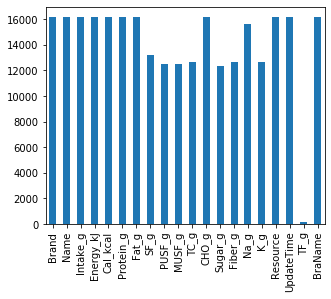

In [17]:
df_hist_nan.plot.bar(figsize=(5, 4))

<font color = #708090> SF_g, PUSF_g, MUSF_g, TC_g, Sugar_g, Fiber_g, Na_g, K_g, TF_g, TF_g 有缺失值（NaN）。 </font>

<font size=3 color = #006400> 將單位欄位之缺失值補 0</font>

df = df.fillna('0') 補"字串"，不然後取代(.str.replace)時，str欄位中的數值型資料會直接被NaN。  
**<font size=3 color = #FF7F00> 後來考量為保留資料的原本性，先不做補缺失值，要補等資料分析再決定。 </font>**

In [18]:
# 缺失值補0
# df = df.fillna('0')

In [19]:
# 再檢查一下
# df_hist_fillna = df.count()
# df_hist_fillna.plot.bar(figsize=(5, 4))

<font size=3 color = #006400> 強迫症：調整欄位順序</font>

In [20]:
# 調整欄位順序 #強迫症
df = (df[['Brand','Name','BraName','Intake_g','Energy_kJ','Cal_kcal','Protein_g','Fat_g','SF_g',
          'PUSF_g','MUSF_g','TF_g','TC_g','CHO_g','Sugar_g','Fiber_g','Na_g','K_g','Resource','UpdateTime']])
# 檢查一下
df[df.notnull()].count()

Brand         16169
Name          16169
BraName       16169
Intake_g      16169
Energy_kJ     16169
Cal_kcal      16169
Protein_g     16169
Fat_g         16169
SF_g          13185
PUSF_g        12519
MUSF_g        12517
TF_g            179
TC_g          12626
CHO_g         16169
Sugar_g       12351
Fiber_g       12644
Na_g          15610
K_g           12622
Resource      16169
UpdateTime    16169
dtype: int64

**<font size=4 color = #FF7F00> 第二部分：單位處理</font>**

In [21]:
# show data
df.head()

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,,大豆/黃豆（水煮）,_大豆/黃豆（水煮）,1磅,1537千焦,367千卡,38.42克,20.19克,2.799克,11.399克,4.577克,NaN,0毫克,29.62克,1.95克,3.6克,45毫克,1610毫克,fatsecret中國,2008024
1,,烤豬肉,_烤豬肉,1盎司，帶骨（去骨後）,227千焦,54千卡,5.94克,3.21克,1.176克,0.265克,1.426克,NaN,18毫克,0克,0克,0克,49毫克,89毫克,fatsecret中國,20070821
2,,煮熟的萵苣菜（烹飪中加油）,_煮熟的萵苣菜（烹飪中加油）,100克,289千焦,69千卡,1.74克,5.38克,1.025克,1.618克,2.418克,NaN,0毫克,4.75克,0.34克,4.3克,585毫克,391毫克,fatsecret中國,20070821
3,好時,醇濃黑巧克力,好時_醇濃黑巧克力,100克,2386千焦,570千卡,9.2克,37.6克,NaN,NaN,NaN,NaN,NaN,34.2克,NaN,NaN,8毫克,NaN,fatsecret中國,20130331
4,,鵪鶉肉,_鵪鶉肉,1只,516千焦,123千卡,20.02克,4.17克,1.214克,1.076克,1.178克,NaN,64毫克,0克,NaN,0克,47毫克,218毫克,fatsecret中國,2008024


<font color = #708090>  16169 rows × 21 columns </font>

<font color = #708090>  21個欄位，1619筆資料  </font>

<font size=3 color = #006400> - 處理 df ['Energy_kJ']</font>

    使統一單位為"千焦"後，刪除單位字串

In [22]:
# 抽出 df[Energy_kJ]單位為"千焦"，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['Energy_kJ'].str.contains('千焦')
bool_

0        True
1        True
2        True
3        True
4        True
         ... 
16164    True
16165    True
16166    True
16167    True
16168    True
Name: Energy_kJ, Length: 16169, dtype: bool

In [23]:
# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    16169
Name: Energy_kJ, dtype: int64

<font color = #708090> bool_之True計數與df之rows數(16169)相同，表示bool_中之值全為true("千焦")，可直接drop掉"千焦"</font>

In [24]:
#以""取代df ["Energy_kJ"] 中之"千焦"
df['Energy_kJ'] = df['Energy_kJ'].str.replace('千焦',"")

In [25]:
#檢查一下
bool_ = df['Energy_kJ'].str.contains('千焦')
bool_.value_counts()

False    16169
Name: Energy_kJ, dtype: int64

<font color = #708090> bool_之False 計數與df之rows數(16169)相同，表示df ['Energy_kJ'] 中之值沒有"千焦"了</font>

<font size=3 color = #006400> - 處理 df ['Cal_kcal']</font>

    使統一單位為"千卡"後，刪除單位字串

In [26]:
# 抽出 df[Cal_kcal]單位為"千卡"，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['Cal_kcal'].str.contains('千卡')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    16169
Name: Cal_kcal, dtype: int64

<font color = #708090> bool_之True計數與df之rows數(16169)相同，表示bool_中之值全為true("千卡")，可直接drop掉"千卡"</font>

In [27]:
#以""取代df[Cal_kcal]中之"千卡"
df['Cal_kcal'] = df['Cal_kcal'].str.replace('千卡',"")

#檢查一下
bool_ = df['Cal_kcal'].str.contains('千卡')
bool_.value_counts()

False    16169
Name: Cal_kcal, dtype: int64

<font color = #708090> bool_中的False計數與df之rows數(16169)相同，表示df['Cal_kcal'] 中之值沒有"千卡"了</font>

<font size=3 color = #006400> - 處理 df ['Protein_g']</font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串

In [28]:
# 抽出 df[Cal_kcal]單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['Protein_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

False    16169
Name: Protein_g, dtype: int64

<font color = #708090> bool_中的False計數與df之rows數(16169)相同，表示df['Protein_g'] 中之值沒有"毫克"</font>

In [29]:
# 再檢查"克"
bool_ = df['Protein_g'].str.contains('克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    16169
Name: Protein_g, dtype: int64

<font color = #708090> bool_之True計數與df之rows數(16169)相同，表示bool_中之值全為true("克")，可直接drop掉"克"</font>

In [30]:
#以""取代df['Protein_g']中之"克"
df['Protein_g'] = df['Protein_g'].str.replace('克',"")

#檢查一下
bool_ = df['Protein_g'] .str.contains('克')
bool_.value_counts()

False    16169
Name: Protein_g, dtype: int64

<font color = #708090> bool_中的False計數與df之rows數(16169)相同，表示df['Protein_g'] 中之值沒有"克"了</font>

<font size=3 color = #006400> - 處理 df ['Fat_g']</font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串

In [31]:
# 抽出 df[Fat_g]單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ =  df['Fat_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

False    16169
Name: Fat_g, dtype: int64

<font color = #708090> bool_中的False計數與df之rows數(16169)相同，表示df['Fat_g'] 中之值沒有"毫克"</font>

In [32]:
# 再檢查"克"
bool_ = df['Fat_g'].str.contains('克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    16169
Name: Fat_g, dtype: int64

<font color = #708090> bool_之True計數與df之rows數(16169)相同，表示bool_中之值全為true("克")，可直接drop掉"克"</font>

In [33]:
#以""取代df ['Fat_g']中之"克"
df['Fat_g'] = df['Fat_g'].str.replace('克',"")

#檢查一下
bool_ = df['Fat_g'].str.contains('克')
bool_.value_counts()

False    16169
Name: Fat_g, dtype: int64

<font color = #708090> bool_中的False計數與df之rows數(16169)相同，表示df['Fat_g']中之值沒有"克"了</font>

<font size=3 color = #006400> - 處理 df['SF_g'] </font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串

In [34]:
# 抽出 df['SF_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ =  df['SF_g'] .str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

False    13185
Name: SF_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['SF_g'] 中之值沒有"毫克"</font>


In [35]:
# 再檢查"克"
bool_ = df['SF_g'].str.contains('克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    13185
Name: SF_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(13185，見df_hist_nan)相同，其他應為上開所補之'0'，表示bool_中之值全為true("克")，可直接drop掉"克"</font>

In [36]:
#以""取代df ['Fat_g']中之"克"
df['SF_g'] = df['SF_g'].str.replace('克',"")

#檢查一下
bool_ = df['SF_g'].str.contains('克')
bool_.value_counts()

False    13185
Name: SF_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['SF_g']中之值沒有"克"了</font>

<font size=3 color = #006400> - 處理 df['PUSF_g'] </font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串

In [37]:
# 抽出 df['PUSF_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ =  df['PUSF_g'] .str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

False    12519
Name: PUSF_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['PUSF_g']中之值沒有"毫克"</font>

In [38]:
# 再檢查"克"
bool_ = df['PUSF_g'].str.contains('克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    12519
Name: PUSF_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(12519，見df_hist_nan)相同，其他應為上開所補之'0'，表示bool_中之值全為true("克")，可直接drop掉"克"</font>

In [39]:
#以""取代df ['PUSF_g']中之"克"
df['PUSF_g'] = df['PUSF_g'].str.replace('克',"")

#檢查一下
bool_ = df['PUSF_g'].str.contains('克')
bool_.value_counts()

False    12519
Name: PUSF_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['PUSF_g']中之值沒有"克"了</font>

<font size=3 color = #006400> - 處理 df['MUSF_g'] </font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串

In [40]:
# 抽出 df['MUSF_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['MUSF_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

False    12517
Name: MUSF_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(12517，見df_hist_nan)相同，表示df['MUSF_g']中之值沒有"毫克"</font>

In [41]:
# 再檢查"克"
bool_ = df['MUSF_g'].str.contains('克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    12517
Name: MUSF_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(12517，見df_hist_nan)相同，，其他應為上開所補之'0'，表示bool_中之值全為true("克")，可直接drop掉"克"</font>

In [42]:
#以""取代df ['MUSF_g'']中之"克"
df['MUSF_g'] = df['MUSF_g'].str.replace('克',"")

#檢查一下
bool_ = df['MUSF_g'].str.contains('克')
bool_.value_counts()

False    12517
Name: MUSF_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['MUSF_g']中之值沒有"克"了</font>

<font size=3 color = #006400> - 處理 df['CHO_g'] </font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串

In [43]:
# 抽出 df['CHO_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['CHO_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

False    16169
Name: CHO_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169，見df_hist_nan)相同，表示df['CHO_g']中之值沒有"毫克"</font>

In [44]:
# 再檢查"克"
bool_ = df['CHO_g'].str.contains('克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    16169
Name: CHO_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(1619，見df_hist_nan)相同，表示bool_中之值全為true("克")，可直接drop掉"克"</font>

In [45]:
#以""取代df ['CHO_g']中之"克"
df['CHO_g'] = df['CHO_g'].str.replace('克',"")

#檢查一下
bool_ = df['CHO_g'].str.contains('克')
bool_.value_counts()

False    16169
Name: CHO_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169，見df_hist_nan)相同，表示df['CHO_g']中之值沒有"克"了</font>

<font size=3 color = #006400> - 處理 df['Sugar_g'] </font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串

In [46]:
# 抽出 df['Sugar_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['Sugar_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

False    12351
Name: Sugar_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示 df['Sugar_g']中之值沒有"毫克"</font>

In [47]:
# 再檢查"克"
bool_ = df['Sugar_g'].str.contains('克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    12351
Name: Sugar_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(12351，見df_hist_nan)相同，其他應為上開所補之'0'，表示bool_中之值全為true("克")，可直接drop掉"克"</font>

In [48]:
#以""取代df['Sugar_g']中之"克"
df['Sugar_g'] = df['Sugar_g'].str.replace('克',"")

#檢查一下
bool_ = df['Sugar_g'].str.contains('克')
bool_.value_counts()

False    12351
Name: Sugar_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['Sugar_g']中之值沒有"克"了</font>

<font size=3 color = #006400> - 處理 df['Fiber_g'] </font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串

In [49]:
# 抽出 df['Fiber_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['Fiber_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

False    12644
Name: Fiber_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數相同，其他應為上開所補之'0'，表示 df['Fiber_g']中之值沒有"毫克"</font>

In [50]:
# 再檢查"克"
bool_ = df['Fiber_g'].str.contains('克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    12644
Name: Fiber_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(12644，見df_hist_nan)相同，其他應為上開所補之'0'，表示bool_中之值全為true("克")，可直接drop掉"克"</font>

In [51]:
#以""取代df['Sugar_g']中之"克"
df['Fiber_g'] = df['Fiber_g'].str.replace('克',"")

#檢查一下
bool_ = df['Fiber_g'].str.contains('克')
bool_.value_counts()

False    12644
Name: Fiber_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['Sugar_g']中之值沒有"克"了</font>

<font size=3 color = #006400> - 處理 df['TF_g'] </font>

先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
使統一單位為"克"後，刪除單位字串

In [52]:
# 抽出 df['TF_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['TF_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

False    179
Name: TF_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(16169)相同，其他應為上開所補之'0'，表示 df['TF_g']，表示 df['Fiber_g']中之值沒有"毫克"</font>

In [53]:
# 再檢查"克"
bool_ =df['TF_g'].str.contains('克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    179
Name: TF_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(179，見df_hist_nan)相同，其他應為上開所補之'0'，表示bool_中之值全為true("克")，可直接drop掉"克"</font>

In [54]:
#以""取代df['TF_g']中之"克"
df['TF_g'] = df['TF_g'].str.replace('克',"")

#檢查一下
bool_ = df['TF_g'].str.contains('克')
bool_.value_counts()

False    179
Name: TF_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['Sugar_g']中之值沒有"克"了</font>

### 處理需要做單位運算之欄位

將df['TC_g']celldata型態轉換成可進行數值運算型態（float64）
```python
df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)
```

<font size=3 color = #006400> - 處理 df['TC_g'] </font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串

In [55]:
# 抽出 df['TC_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df ['TC_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    12626
Name: TC_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(12626)相同，其他應為上開所補之'0'，表示 ['TC_g']中之值皆為"毫克"，可直接drop掉"克"</font>

In [56]:
#以""取代df['TC_g']中之"毫克"
df['TC_g'] = df['TC_g'].str.replace('毫克',"")

#檢查一下
bool_ = df['TC_g'].str.contains('毫克')
bool_.value_counts()

False    12626
Name: TC_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['TC_g']中之值沒有"毫克"了</font>

In [57]:
# 將df['TC_g']celldata型態轉換成float64
df['TC_g'] = df['TC_g'].apply(pd.to_numeric)

# 檢查一下
print(type(df['TC_g'][0]))

<class 'numpy.float64'>


對DataFrame的多個列同時進行運算，可以使用apply，例如col3 = col1 + 2 * col2：  
```python
df['col3'] = df.apply(lambda x: x['col1'] + 2 * x['col2'], axis=1)
```

In [58]:
#多列運算 #單位轉換：毫克/1000 == 克
df['TC_g']= df.apply(lambda x: x['TC_g']/1000, axis=1)

#檢查一下
df.head(5)

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,,大豆/黃豆（水煮）,_大豆/黃豆（水煮）,1磅,1537,367,38.42,20.19,2.799,11.399,4.577,NaN,0.000,29.62,1.95,3.6,45毫克,1610毫克,fatsecret中國,2008024
1,,烤豬肉,_烤豬肉,1盎司，帶骨（去骨後）,227,54,5.94,3.21,1.176,0.265,1.426,NaN,0.018,0,0,0,49毫克,89毫克,fatsecret中國,20070821
2,,煮熟的萵苣菜（烹飪中加油）,_煮熟的萵苣菜（烹飪中加油）,100克,289,69,1.74,5.38,1.025,1.618,2.418,NaN,0.000,4.75,0.34,4.3,585毫克,391毫克,fatsecret中國,20070821
3,好時,醇濃黑巧克力,好時_醇濃黑巧克力,100克,2386,570,9.2,37.6,NaN,NaN,NaN,NaN,NaN,34.2,NaN,NaN,8毫克,NaN,fatsecret中國,20130331
4,,鵪鶉肉,_鵪鶉肉,1只,516,123,20.02,4.17,1.214,1.076,1.178,NaN,0.064,0,NaN,0,47毫克,218毫克,fatsecret中國,2008024


<font size=3 color = #006400> - 處理 df['Na_g'] </font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串
    
    處理方法同上開df['TC_g']

In [59]:
# 抽出 df['Na_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['Na_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    15610
Name: Na_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(15610)相同，其他應為上開所補之'0'，表示 df['Na_g']中之值皆為"毫克"，可直接drop掉"克"</font>

In [60]:
#以""取代df['Na_g']中之"毫克"
df['Na_g'] = df['Na_g'].str.replace('毫克',"")

#檢查一下
bool_ = df['Na_g'].str.contains('毫克')
bool_.value_counts()

False    15610
Name: Na_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['TC_g']中之值沒有"毫克"了</font>

In [61]:
# 將df['Na_g']celldata型態轉換成float64
df['Na_g'] = df['Na_g'].apply(pd.to_numeric)

# 檢查一下
print(type(df['Na_g'][0]))

<class 'numpy.float64'>


In [62]:
#多列運算 #單位轉換：毫克/1000 == 克
df['Na_g']= df.apply(lambda x: x['Na_g']/1000, axis=1)

#檢查一下
df.head(5)

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,,大豆/黃豆（水煮）,_大豆/黃豆（水煮）,1磅,1537,367,38.42,20.19,2.799,11.399,4.577,NaN,0.000,29.62,1.95,3.6,0.045,1610毫克,fatsecret中國,2008024
1,,烤豬肉,_烤豬肉,1盎司，帶骨（去骨後）,227,54,5.94,3.21,1.176,0.265,1.426,NaN,0.018,0,0,0,0.049,89毫克,fatsecret中國,20070821
2,,煮熟的萵苣菜（烹飪中加油）,_煮熟的萵苣菜（烹飪中加油）,100克,289,69,1.74,5.38,1.025,1.618,2.418,NaN,0.000,4.75,0.34,4.3,0.585,391毫克,fatsecret中國,20070821
3,好時,醇濃黑巧克力,好時_醇濃黑巧克力,100克,2386,570,9.2,37.6,NaN,NaN,NaN,NaN,NaN,34.2,NaN,NaN,0.008,NaN,fatsecret中國,20130331
4,,鵪鶉肉,_鵪鶉肉,1只,516,123,20.02,4.17,1.214,1.076,1.178,NaN,0.064,0,NaN,0,0.047,218毫克,fatsecret中國,2008024


<font size=3 color = #006400> - 處理 df['K_g'] </font>
    
    先搜尋該欄中，是否有"毫克"，因為字較多，若以"克"搜尋，會一併搜尋到"毫克"，若到時刪除"克"，"毫"會遺留下來。
    使統一單位為"克"後，刪除單位字串
    
    處理方法同上開df['TC_g']

In [63]:
# 抽出 df['K_g'] 單位為'毫克'，檢查使否有以外的單位
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['K_g'].str.contains('毫克')

# 計算 bool_ 中True及Fasle之出現頻率
bool_.value_counts()

True    12622
Name: K_g, dtype: int64

<font color = #708090> bool_中的True計數與未補缺失值之df的rows數(12622)相同，其他應為上開所補之'0'，表示 df['K_g']中之值皆為"毫克"，可直接drop掉"克"</font>

In [64]:
#以""取代df['K_g'] 中之"毫克"
df['K_g'] = df['K_g'].str.replace('毫克',"")

#檢查一下
bool_ = df['K_g'].str.contains('毫克')
bool_.value_counts()

False    12622
Name: K_g, dtype: int64

<font color = #708090> bool_中的False計數與未補缺失值之df的rows數(16169)相同，表示df['K_g']中之值沒有"毫克"了</font>

In [65]:
# 將df['K_g']celldata型態轉換成float64
df['K_g'] = df['K_g'].apply(pd.to_numeric)

# 檢查一下
print(type(df['K_g'][0]))

<class 'numpy.float64'>


In [66]:
#多列運算 #單位轉換：毫克/1000 == 克
df['K_g']= df.apply(lambda x: x['K_g']/1000, axis=1)

#檢查一下
df.head(5)

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,,大豆/黃豆（水煮）,_大豆/黃豆（水煮）,1磅,1537,367,38.42,20.19,2.799,11.399,4.577,NaN,0.000,29.62,1.95,3.6,0.045,1.610,fatsecret中國,2008024
1,,烤豬肉,_烤豬肉,1盎司，帶骨（去骨後）,227,54,5.94,3.21,1.176,0.265,1.426,NaN,0.018,0,0,0,0.049,0.089,fatsecret中國,20070821
2,,煮熟的萵苣菜（烹飪中加油）,_煮熟的萵苣菜（烹飪中加油）,100克,289,69,1.74,5.38,1.025,1.618,2.418,NaN,0.000,4.75,0.34,4.3,0.585,0.391,fatsecret中國,20070821
3,好時,醇濃黑巧克力,好時_醇濃黑巧克力,100克,2386,570,9.2,37.6,NaN,NaN,NaN,NaN,NaN,34.2,NaN,NaN,0.008,NaN,fatsecret中國,20130331
4,,鵪鶉肉,_鵪鶉肉,1只,516,123,20.02,4.17,1.214,1.076,1.178,NaN,0.064,0,NaN,0,0.047,0.218,fatsecret中國,2008024


In [67]:
# 存一下檔
df.to_csv('E:\\III\\III\\workplace\\TopicProject\\Data\\Data_fatsecret_gNutrient_v2.csv', encoding='utf-8', index=False)

**<font size=4 color = #FF7F00> 第三部分：食用量單位統一 </font>**

<font size=3 color = #006400> - 提取飲料資料</font>

In [66]:
# 抽出 df[Intake_g]單位為"毫升"或"升"，歸類成飲料
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df['Intake_g'].str.contains('升')
print(bool_)

0        False
1        False
2        False
3        False
4        False
         ...  
16164    False
16165    False
16166    False
16167    False
16168    False
Name: Intake_g, Length: 16169, dtype: bool


In [67]:
# 透過布林值，從df中提取相應之資料
# 通過dataframe的基本操作將其選取出來
df_drink = df[bool_]
df_drink 

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
28,星巴克,咖啡飲料,星巴克_咖啡飲料,100毫升,258,62,2.1,1.5,NaN,NaN,NaN,NaN,NaN,9.8,NaN,NaN,0.0320,NaN,fatsecret中國,2017058
36,伊利牛奶,脫脂牛奶,伊利牛奶_脫脂牛奶,100克(100毫升),138,33,3,0,NaN,NaN,NaN,NaN,NaN,5.1,NaN,NaN,0.1000,NaN,fatsecret中國,20180510
46,,濃縮咖啡,_濃縮咖啡,1杯（240毫升）,20,5,0.28,0.43,0.218,0.218,0,NaN,0.000,0,0,0,0.0330,0.273,fatsecret中國,20070821
50,三得利,烏龍茶低糖,三得利_烏龍茶低糖,100毫升,40,10,0,0,0,NaN,NaN,NaN,NaN,2,2,NaN,0.0140,NaN,fatsecret中國,2015062
62,,能量飲料,_能量飲料,130毫升,56,14,0.08,0.02,0,0,0,NaN,0.000,3.28,3.02,0,0.0250,0.001,fatsecret中國,20070821
70,,可哥加糖（低脂肪）,_可哥加糖（低脂肪）,130毫升,93,22,1.07,0.34,0.237,0.011,0.086,NaN,0.002,3.76,3.61,0.1,0.0170,0.052,fatsecret中國,20070821
77,,瑪黛茶,_瑪黛茶,100毫升,84,20,0,0,0.002,0.004,0.001,NaN,0.000,5.3,5.01,0,0.0030,0.035,fatsecret中國,20070821
83,紅牛,紅牛,紅牛_紅牛,100毫升,233,56,0,0,NaN,NaN,NaN,NaN,NaN,13.3,NaN,NaN,0.0373,NaN,fatsecret中國,20110217
86,肯德基,香柚蜂蜜茶,肯德基_香柚蜂蜜茶,1杯(300毫升),103,25,0.03,0.13,NaN,NaN,NaN,NaN,NaN,5.6,NaN,NaN,NaN,NaN,fatsecret中國,20140217
87,蒙牛,蒙牛純牛奶,蒙牛_蒙牛純牛奶,100毫升,284,68,3.1,3.7,NaN,NaN,NaN,NaN,NaN,4.8,NaN,NaN,0.0620,NaN,fatsecret中國,20130314


In [69]:
# 重整df_drink之索引
df_drink = df_drink.reset_index(drop=True)

In [70]:
# 計算df_drink['Intake_g']內元素的出現頻度
Counter(df_drink['Intake_g'])

Counter({'100毫升': 695,
         '100克(100毫升)': 4,
         '1杯（240毫升）': 63,
         '130毫升': 127,
         '1杯(300毫升)': 1,
         '1個（學生奶盒大小）（240毫升）': 6,
         '1杯（玻璃杯）（105毫升）': 6,
         '1瓶(470毫升）': 3,
         '1杯（150毫升）': 1,
         '1杯（咖啡杯大小）（180毫升）': 16,
         '1150毫升的份量': 10,
         '1份，個人份量（105毫升）': 1,
         '1茶杯（180毫升）': 11,
         '1瓶(400毫升)': 1,
         '130毫升（不加冰）': 15,
         '1罐／瓶(470毫升）': 6,
         '100ml(100毫升)': 12,
         '1杯（20毫升）': 1,
         '1杯（奶昔）（300毫升）': 1,
         '1中杯，620毫升': 1,
         '1份(100毫升)': 1,
         '1份(15毫升)': 3,
         '1罐／瓶（350毫升）': 5,
         '1中杯的，470毫升份量': 2,
         '1瓶(500毫升)': 1,
         '1小杯，355毫升': 2,
         '1罐（355毫升）': 1,
         '1罐（350毫升）': 4,
         '1杯（雞尾酒杯）（120毫升）': 1,
         '1罐（300毫升）': 5,
         '1條(150毫升)': 1,
         '1盒(250毫升)': 4,
         '1以30毫升為衡量食用單位，飲料': 2,
         '1顆（方塊形）（180毫升）': 2,
         '1杯（355毫升）': 1,
         '2粒(774毫升)': 1,
         '1份(250毫升)': 3,
         '1包(2

In [71]:
#多列運算 #刪除"毫升"以後的字串，要"毫升"前面的字串
df_drink['Intake_g']= df_drink.Intake_g.apply(lambda x: x.split("毫升")[0]+"毫升")
df_drink

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,星巴克,咖啡飲料,星巴克_咖啡飲料,100毫升,258,62,2.1,1.5,NaN,NaN,NaN,NaN,NaN,9.8,NaN,NaN,0.0320,NaN,fatsecret中國,2017058
1,伊利牛奶,脫脂牛奶,伊利牛奶_脫脂牛奶,100克(100毫升,138,33,3,0,NaN,NaN,NaN,NaN,NaN,5.1,NaN,NaN,0.1000,NaN,fatsecret中國,20180510
2,,濃縮咖啡,_濃縮咖啡,1杯（240毫升,20,5,0.28,0.43,0.218,0.218,0,NaN,0.000,0,0,0,0.0330,0.273,fatsecret中國,20070821
3,三得利,烏龍茶低糖,三得利_烏龍茶低糖,100毫升,40,10,0,0,0,NaN,NaN,NaN,NaN,2,2,NaN,0.0140,NaN,fatsecret中國,2015062
4,,能量飲料,_能量飲料,130毫升,56,14,0.08,0.02,0,0,0,NaN,0.000,3.28,3.02,0,0.0250,0.001,fatsecret中國,20070821
5,,可哥加糖（低脂肪）,_可哥加糖（低脂肪）,130毫升,93,22,1.07,0.34,0.237,0.011,0.086,NaN,0.002,3.76,3.61,0.1,0.0170,0.052,fatsecret中國,20070821
6,,瑪黛茶,_瑪黛茶,100毫升,84,20,0,0,0.002,0.004,0.001,NaN,0.000,5.3,5.01,0,0.0030,0.035,fatsecret中國,20070821
7,紅牛,紅牛,紅牛_紅牛,100毫升,233,56,0,0,NaN,NaN,NaN,NaN,NaN,13.3,NaN,NaN,0.0373,NaN,fatsecret中國,20110217
8,肯德基,香柚蜂蜜茶,肯德基_香柚蜂蜜茶,1杯(300毫升,103,25,0.03,0.13,NaN,NaN,NaN,NaN,NaN,5.6,NaN,NaN,NaN,NaN,fatsecret中國,20140217
9,蒙牛,蒙牛純牛奶,蒙牛_蒙牛純牛奶,100毫升,284,68,3.1,3.7,NaN,NaN,NaN,NaN,NaN,4.8,NaN,NaN,0.0620,NaN,fatsecret中國,20130314


In [72]:
# 再看一下 # 計算df_drink['Intake_g']內元素的出現頻度
Counter(df_drink['Intake_g'])

Counter({'100毫升': 695,
         '100克(100毫升': 4,
         '1杯（240毫升': 63,
         '130毫升': 142,
         '1杯(300毫升': 1,
         '1個（學生奶盒大小）（240毫升': 6,
         '1杯（玻璃杯）（105毫升': 6,
         '1瓶(470毫升': 3,
         '1杯（150毫升': 1,
         '1杯（咖啡杯大小）（180毫升': 16,
         '1150毫升': 10,
         '1份，個人份量（105毫升': 1,
         '1茶杯（180毫升': 11,
         '1瓶(400毫升': 1,
         '1罐／瓶(470毫升': 6,
         '100ml(100毫升': 12,
         '1杯（20毫升': 1,
         '1杯（奶昔）（300毫升': 1,
         '1中杯，620毫升': 1,
         '1份(100毫升': 1,
         '1份(15毫升': 3,
         '1罐／瓶（350毫升': 5,
         '1中杯的，470毫升': 2,
         '1瓶(500毫升': 1,
         '1小杯，355毫升': 2,
         '1罐（355毫升': 1,
         '1罐（350毫升': 4,
         '1杯（雞尾酒杯）（120毫升': 1,
         '1罐（300毫升': 5,
         '1條(150毫升': 1,
         '1盒(250毫升': 4,
         '1以30毫升': 10,
         '1顆（方塊形）（180毫升': 2,
         '1杯（355毫升': 1,
         '2粒(774毫升': 1,
         '1份(250毫升': 3,
         '1包(250毫升': 1,
         '1杯(500毫升': 1,
         '1杯(250毫升': 2,
         '1顆

In [73]:
# 刪除"（"或"("以前的字串，要"（"或"("後面的字串
for i in range (len(df_drink['Intake_g'])):
    if '（' in df_drink['Intake_g'][i]:
        df_drink['Intake_g'][i] = (df_drink['Intake_g'][i]).split("（")[-1]
    if '(' in df_drink['Intake_g'][i]:
        df_drink['Intake_g'][i] = (df_drink['Intake_g'][i]).split("(")[-1]
    if '，' in df_drink['Intake_g'][i]:
        df_drink['Intake_g'][i] = (df_drink['Intake_g'][i]).split("，")[-1]
    if '以' in df_drink['Intake_g'][i]:
        df_drink['Intake_g'][i] = (df_drink['Intake_g'][i]).split("以")[-1]
df_drink

c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,星巴克,咖啡飲料,星巴克_咖啡飲料,100毫升,258,62,2.1,1.5,NaN,NaN,NaN,NaN,NaN,9.8,NaN,NaN,0.0320,NaN,fatsecret中國,2017058
1,伊利牛奶,脫脂牛奶,伊利牛奶_脫脂牛奶,100毫升,138,33,3,0,NaN,NaN,NaN,NaN,NaN,5.1,NaN,NaN,0.1000,NaN,fatsecret中國,20180510
2,,濃縮咖啡,_濃縮咖啡,240毫升,20,5,0.28,0.43,0.218,0.218,0,NaN,0.000,0,0,0,0.0330,0.273,fatsecret中國,20070821
3,三得利,烏龍茶低糖,三得利_烏龍茶低糖,100毫升,40,10,0,0,0,NaN,NaN,NaN,NaN,2,2,NaN,0.0140,NaN,fatsecret中國,2015062
4,,能量飲料,_能量飲料,130毫升,56,14,0.08,0.02,0,0,0,NaN,0.000,3.28,3.02,0,0.0250,0.001,fatsecret中國,20070821
5,,可哥加糖（低脂肪）,_可哥加糖（低脂肪）,130毫升,93,22,1.07,0.34,0.237,0.011,0.086,NaN,0.002,3.76,3.61,0.1,0.0170,0.052,fatsecret中國,20070821
6,,瑪黛茶,_瑪黛茶,100毫升,84,20,0,0,0.002,0.004,0.001,NaN,0.000,5.3,5.01,0,0.0030,0.035,fatsecret中國,20070821
7,紅牛,紅牛,紅牛_紅牛,100毫升,233,56,0,0,NaN,NaN,NaN,NaN,NaN,13.3,NaN,NaN,0.0373,NaN,fatsecret中國,20110217
8,肯德基,香柚蜂蜜茶,肯德基_香柚蜂蜜茶,300毫升,103,25,0.03,0.13,NaN,NaN,NaN,NaN,NaN,5.6,NaN,NaN,NaN,NaN,fatsecret中國,20140217
9,蒙牛,蒙牛純牛奶,蒙牛_蒙牛純牛奶,100毫升,284,68,3.1,3.7,NaN,NaN,NaN,NaN,NaN,4.8,NaN,NaN,0.0620,NaN,fatsecret中國,20130314


In [74]:
# 檢查一下 # 計算df_drink['Intake_g']內元素的出現頻度
Counter(df_drink['Intake_g'])

Counter({'100毫升': 713,
         '240毫升': 69,
         '130毫升': 142,
         '300毫升': 10,
         '105毫升': 7,
         '470毫升': 11,
         '150毫升': 2,
         '180毫升': 30,
         '1150毫升': 10,
         '400毫升': 3,
         '20毫升': 1,
         '620毫升': 3,
         '15毫升': 4,
         '350毫升': 9,
         '500毫升': 2,
         '355毫升': 5,
         '120毫升': 3,
         '250毫升': 13,
         '30毫升': 11,
         '774毫升': 1,
         '10毫升': 1,
         '35毫升': 1,
         '45毫升': 3,
         '330毫升': 3,
         '200毫升': 4,
         '50毫升': 2,
         '220毫升': 1,
         '450毫升': 1,
         '60毫升': 1,
         '22毫升': 1,
         '630毫升': 1,
         '125毫升': 2,
         '590毫升': 3,
         '1473毫升': 4,
         '90毫升': 1,
         '475毫升': 2,
         '950毫升': 2,
         '245毫升': 1,
         '281毫升': 1,
         '1毫升': 1})

In [75]:
#以""取代df_drink['Intake_g'] 中之"毫升"
df_drink['Intake_g']= df_drink['Intake_g'].str.replace('毫升',"")
# 檢查一下
df_drink['Intake_g'].str.contains('毫升').value_counts()

False    1085
Name: Intake_g, dtype: int64

<font color = #708090> False計數與df_drink['Intake_g']之rows數(1085)相同，表示df_drink['Intake_g']中之值沒有"毫升"了</font>

In [76]:
# 將各欄位celldata數值轉換成float64
list_ = ['Intake_g', 'Energy_kJ', 'Cal_kcal' , 'Protein_g', 'Fat_g', 'SF_g', 'PUSF_g', 
         'MUSF_g', 'TF_g', 'TC_g', 'CHO_g', 'Sugar_g', 'Fiber_g', 'Na_g', 'K_g']
for i in list_:
    df_drink[i] = df_drink[i].apply(pd.to_numeric)

# 確認一下是否都數值化
df_drink.describe()

,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,UpdateTime
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,635.000000,477.000000,476.000000,11.000000,492.000000,1085.000000,592.000000,489.000000,1002.000000,482.000000,1.085000e+03
mean,148.419355,273.353917,65.319816,1.778839,1.842415,0.721669,0.217426,0.407017,0.018909,0.003856,8.885143,7.746047,0.398671,0.078879,0.102129,1.436634e+07
std,154.553136,334.928830,80.047495,3.478312,5.199838,2.338824,2.444585,1.826376,0.035252,0.013350,12.037425,13.268675,1.659746,0.370649,0.147836,8.439900e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.008024e+06
25%,100.000000,101.000000,24.000000,0.020000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,2.910000,0.107500,0.000000,0.006000,0.012250,2.015071e+06
50%,100.000000,197.000000,47.000000,0.800000,0.190000,0.007000,0.009000,0.007000,0.000000,0.000000,5.150000,3.165000,0.000000,0.026000,0.047500,2.009113e+07
75%,130.000000,289.000000,69.000000,3.000000,2.320000,0.301000,0.059000,0.144000,0.016000,0.002000,10.600000,9.510000,0.100000,0.060000,0.127750,2.015042e+07
max,1473.000000,3700.000000,884.000000,75.600000,100.000000,23.208000,53.000000,32.000000,0.100000,0.138000,103.150000,98.620000,20.300000,9.200000,0.988000,2.019091e+07


<font color = #708090> list_內欄位之celldata皆數值化</font>

In [ ]:
# 看一下df_drink
df_drink

In [ ]:
# 存一下檔
df_drink.to_csv('E:\\III\\III\\workplace\\TopicProject\\Data\\Data_fatsecret_gNutrient_drink_ml_v2.csv', encoding='utf-8', index=False)

#### 刪除df_drink['BraName']重複值

In [79]:
# 刪除df_drink['BraName']重複值
# dataframe.drop_duplicates(subset='column', keep='first', inplace = False) 
# subset：以哪個欄位當主；keep：保留哪一值，{'first', 'last', 'False'（刪除所有重複）}, default 'first'；
# inplace : boolean, default False. Whether to drop duplicates in place or to return a copy
df_drink_ml_rmDupli = df_drink.drop_duplicates(subset='BraName', keep='first') 

# 重整df_food_g之索引
df_drink_ml_rmDupli = df_drink_ml_rmDupli.reset_index(drop=True)

# 瞻仰一下啊
df_drink_ml_rmDupli

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,星巴克,咖啡飲料,星巴克_咖啡飲料,100,258,62,2.10,1.50,NaN,NaN,NaN,NaN,NaN,9.80,NaN,NaN,0.0320,NaN,fatsecret中國,2017058
1,伊利牛奶,脫脂牛奶,伊利牛奶_脫脂牛奶,100,138,33,3.00,0.00,NaN,NaN,NaN,NaN,NaN,5.10,NaN,NaN,0.1000,NaN,fatsecret中國,20180510
2,,濃縮咖啡,_濃縮咖啡,240,20,5,0.28,0.43,0.218,0.218,0.000,NaN,0.000,0.00,0.00,0.0,0.0330,0.273,fatsecret中國,20070821
3,三得利,烏龍茶低糖,三得利_烏龍茶低糖,100,40,10,0.00,0.00,0.000,NaN,NaN,NaN,NaN,2.00,2.00,NaN,0.0140,NaN,fatsecret中國,2015062
4,,能量飲料,_能量飲料,130,56,14,0.08,0.02,0.000,0.000,0.000,NaN,0.000,3.28,3.02,0.0,0.0250,0.001,fatsecret中國,20070821
5,,可哥加糖（低脂肪）,_可哥加糖（低脂肪）,130,93,22,1.07,0.34,0.237,0.011,0.086,NaN,0.002,3.76,3.61,0.1,0.0170,0.052,fatsecret中國,20070821
6,,瑪黛茶,_瑪黛茶,100,84,20,0.00,0.00,0.002,0.004,0.001,NaN,0.000,5.30,5.01,0.0,0.0030,0.035,fatsecret中國,20070821
7,紅牛,紅牛,紅牛_紅牛,100,233,56,0.00,0.00,NaN,NaN,NaN,NaN,NaN,13.30,NaN,NaN,0.0373,NaN,fatsecret中國,20110217
8,肯德基,香柚蜂蜜茶,肯德基_香柚蜂蜜茶,300,103,25,0.03,0.13,NaN,NaN,NaN,NaN,NaN,5.60,NaN,NaN,NaN,NaN,fatsecret中國,20140217
9,蒙牛,蒙牛純牛奶,蒙牛_蒙牛純牛奶,100,284,68,3.10,3.70,NaN,NaN,NaN,NaN,NaN,4.80,NaN,NaN,0.0620,NaN,fatsecret中國,20130314


In [80]:
# 存一下檔
df_drink_ml_rmDupli.to_csv('E:\\III\\III\\workplace\\TopicProject\\Data\\Data_fatsecret_gNutrient_drink_ml_rmDupli_v2.csv', encoding='utf-8', index=False)

<font size=3 color = #006400> - 提取食物資料</font>

In [81]:
# 抽出 df[Intake_g]單位為"毫升"或"升"
# 首先將他們進行字串化，並得到其對應的布林值
# 反轉林值，以抽取食物資料
# ~表invert，相反的意思。
bool_ = ~df['Intake_g'].str.contains('升')
print(bool_)

0        True
1        True
2        True
3        True
4        True
         ... 
16164    True
16165    True
16166    True
16167    True
16168    True
Name: Intake_g, Length: 16169, dtype: bool


In [82]:
# 透過布林值，從df中提取相應之資料
# 通過dataframe的基本操作將其選取出來
df_food = df[bool_]
df_food

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,,大豆/黃豆（水煮）,_大豆/黃豆（水煮）,1磅,1537,367,38.42,20.19,2.799,11.399,4.577,NaN,0.000,29.62,1.95,3.6,0.045,1.610,fatsecret中國,2008024
1,,烤豬肉,_烤豬肉,1盎司，帶骨（去骨後）,227,54,5.94,3.21,1.176,0.265,1.426,NaN,0.018,0,0,0,0.049,0.089,fatsecret中國,20070821
2,,煮熟的萵苣菜（烹飪中加油）,_煮熟的萵苣菜（烹飪中加油）,100克,289,69,1.74,5.38,1.025,1.618,2.418,NaN,0.000,4.75,0.34,4.3,0.585,0.391,fatsecret中國,20070821
3,好時,醇濃黑巧克力,好時_醇濃黑巧克力,100克,2386,570,9.2,37.6,NaN,NaN,NaN,NaN,NaN,34.2,NaN,NaN,0.008,NaN,fatsecret中國,20130331
4,,鵪鶉肉,_鵪鶉肉,1只,516,123,20.02,4.17,1.214,1.076,1.178,NaN,0.064,0,NaN,0,0.047,0.218,fatsecret中國,2008024
5,,蟹肉餅/蟹肉條,_蟹肉餅/蟹肉條,1份（63克）,443,106,14,5.03,0.965,1.469,1.951,NaN,0.095,0.42,0.18,0.1,0.217,0.224,fatsecret中國,20070821
6,,香瓜,_香瓜,100克,110,26,0.65,0.15,0.04,0.063,0.002,NaN,0.000,6.33,6.09,0.7,0.013,0.207,fatsecret中國,20130115
7,,烤土豆加優酪乳油（帶皮吃）,_烤土豆加優酪乳油（帶皮吃）,1個，中型的,1323,316,6.14,16,8.255,1.638,5.242,NaN,0.026,39.11,2.12,3.8,0.451,1.008,fatsecret中國,20070821
8,,熟豆加辣椒（罐頭包裝）,_熟豆加辣椒（罐頭包裝）,1杯,1200,287,14.62,14.05,6.021,0.927,5.97,NaN,0.044,30.49,3.38,11.3,1.336,0.934,fatsecret中國,2008024
9,,豬仔包,_豬仔包,1份（65克）,670,160,5.17,1.76,0.377,0.408,0.715,NaN,0.000,30.39,0.17,1.8,0.356,0.067,fatsecret中國,20141214


In [84]:
# 重整df_drink之索引
df_food = df_food.reset_index(drop=True)

In [85]:
# 計算df_drink['Intake_g']內元素的出現頻度
Counter(df_food['Intake_g'])

Counter({'1磅': 300,
         '1盎司，帶骨（去骨後）': 49,
         '100克': 4938,
         '1只': 6,
         '1份（63克）': 5,
         '1個，中型的': 87,
         '1杯': 1148,
         '1份（65克）': 10,
         '1盎司': 1584,
         '1個，袖珍型': 23,
         '1份（250克）': 31,
         '100g(100克)': 108,
         '1份（17克）': 3,
         '1個（直徑15釐米）': 6,
         '1份': 88,
         '1個，中型的（5.5釐米直徑-8釐米直徑）': 6,
         '1片（厚的）（約7釐米×5釐米×1釐米）': 1,
         '1個（28克）': 3,
         '1片（葉）': 13,
         '1份（157克）': 6,
         '1份（125克）': 30,
         '1份（300克）': 25,
         '1個': 389,
         '1份（140克）': 18,
         '1條／根': 22,
         '1個，小的（直徑約15釐米）': 1,
         '1片（厚的）（約5釐米×4釐米×1釐米）': 16,
         '1份(30克)': 34,
         '1薄片（約5釐米×4釐米×0.3釐米）': 16,
         '1/2盎司': 10,
         '1大塊的（38釐米直徑）': 11,
         '1杯（煮熟的，條狀）': 5,
         '1塊（1/8塊，23釐米直徑）': 12,
         '1個，小的': 88,
         '1份（50克）': 104,
         '1立方英寸（去骨，煮熟的，去脂肪）': 3,
         '1個（長形類的）（直徑5.5釐米，長12釐米，生的）': 5,
         '1份（85克）': 120,
         '1份（

In [86]:
# 將1/2轉換成0.5以後續方便運算
df_food['Intake_g']= df_food['Intake_g'].str.replace('1/2',"0.5")
#檢查一下
Counter(df_food['Intake_g'])

Counter({'1磅': 300,
         '1盎司，帶骨（去骨後）': 49,
         '100克': 4938,
         '1只': 6,
         '1份（63克）': 5,
         '1個，中型的': 87,
         '1杯': 1148,
         '1份（65克）': 10,
         '1盎司': 1584,
         '1個，袖珍型': 23,
         '1份（250克）': 31,
         '100g(100克)': 108,
         '1份（17克）': 3,
         '1個（直徑15釐米）': 6,
         '1份': 88,
         '1個，中型的（5.5釐米直徑-8釐米直徑）': 6,
         '1片（厚的）（約7釐米×5釐米×1釐米）': 1,
         '1個（28克）': 3,
         '1片（葉）': 13,
         '1份（157克）': 6,
         '1份（125克）': 30,
         '1份（300克）': 25,
         '1個': 389,
         '1份（140克）': 18,
         '1條／根': 22,
         '1個，小的（直徑約15釐米）': 1,
         '1片（厚的）（約5釐米×4釐米×1釐米）': 16,
         '1份(30克)': 34,
         '1薄片（約5釐米×4釐米×0.3釐米）': 16,
         '0.5盎司': 10,
         '1大塊的（38釐米直徑）': 11,
         '1杯（煮熟的，條狀）': 5,
         '1塊（1/8塊，23釐米直徑）': 12,
         '1個，小的': 88,
         '1份（50克）': 104,
         '1立方英寸（去骨，煮熟的，去脂肪）': 3,
         '1個（長形類的）（直徑5.5釐米，長12釐米，生的）': 5,
         '1份（85克）': 120,
         '1份（

In [87]:
# "母雞"太煩了，先處理它
# 1盎司，帶骨（去骨後）會造成下列程式碼誤刪，先處排除"，"，取前面字串
for i in range (len(df_food['Intake_g'])):
    if '盎司' in df_food['Intake_g'][i] and '，' in df_food['Intake_g'][i] :
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("，")[0])
        
# 檢查一下
Counter(df_food['Intake_g'])

c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Counter({'1磅': 300,
         '1盎司': 2138,
         '100克': 4938,
         '1只': 6,
         '1份（63克）': 5,
         '1個，中型的': 87,
         '1杯': 1148,
         '1份（65克）': 10,
         '1個，袖珍型': 23,
         '1份（250克）': 31,
         '100g(100克)': 108,
         '1份（17克）': 3,
         '1個（直徑15釐米）': 6,
         '1份': 88,
         '1個，中型的（5.5釐米直徑-8釐米直徑）': 6,
         '1片（厚的）（約7釐米×5釐米×1釐米）': 1,
         '1個（28克）': 3,
         '1片（葉）': 13,
         '1份（157克）': 6,
         '1份（125克）': 30,
         '1份（300克）': 25,
         '1個': 389,
         '1份（140克）': 18,
         '1條／根': 22,
         '1個，小的（直徑約15釐米）': 1,
         '1片（厚的）（約5釐米×4釐米×1釐米）': 16,
         '1份(30克)': 34,
         '1薄片（約5釐米×4釐米×0.3釐米）': 16,
         '0.5盎司': 10,
         '1大塊的（38釐米直徑）': 11,
         '1杯（煮熟的，條狀）': 5,
         '1塊（1/8塊，23釐米直徑）': 12,
         '1個，小的': 88,
         '1份（50克）': 104,
         '1立方英寸（去骨，煮熟的，去脂肪）': 3,
         '1個（長形類的）（直徑5.5釐米，長12釐米，生的）': 5,
         '1份（85克）': 120,
         '1份（105克）': 18,
         '1份（120

In [88]:
# 人眼看的 QQ
# 將其他字元，如"，"、"共"、"重"、"前"、"份"、"塊"、"為"、"約"、","、"-"，取後面字串
for i in range (len(df_food['Intake_g'])):
    if '，' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("，")[-1])

for i in range (len(df_food['Intake_g'])):
    if '共' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("共")[-1])

for i in range (len(df_food['Intake_g'])):
    if '重' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("重")[-1])

for i in range (len(df_food['Intake_g'])):
    if '前' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("前")[-1])

for i in range (len(df_food['Intake_g'])):
    if '份' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("份")[-1])

for i in range (len(df_food['Intake_g'])):
    if '塊' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("塊")[-1])

for i in range (len(df_food['Intake_g'])):
    if '為' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("為")[-1])

for i in range (len(df_food['Intake_g'])):
    if '約' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("約")[-1])

for i in range (len(df_food['Intake_g'])):
    if ',' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split(",")[-1])  

for i in range (len(df_food['Intake_g'])):
    if '-' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("-")[-1])  
        
# 檢查一下
Counter(df_food['Intake_g'])

c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

Counter({'1磅': 300,
         '1盎司': 2138,
         '100克': 4938,
         '1只': 6,
         '（63克）': 5,
         '中型的': 87,
         '1杯': 1148,
         '（65克）': 10,
         '袖珍型': 23,
         '（250克）': 31,
         '100g(100克)': 108,
         '（17克）': 3,
         '1個（直徑15釐米）': 6,
         '': 303,
         '8釐米直徑）': 6,
         '7釐米×5釐米×1釐米）': 1,
         '1個（28克）': 3,
         '1片（葉）': 13,
         '（157克）': 6,
         '（125克）': 30,
         '（300克）': 25,
         '1個': 389,
         '（140克）': 18,
         '1條／根': 22,
         '15釐米）': 3,
         '5釐米×4釐米×1釐米）': 16,
         '(30克)': 37,
         '5釐米×4釐米×0.3釐米）': 16,
         '0.5盎司': 10,
         '的（38釐米直徑）': 11,
         '條狀）': 5,
         '23釐米直徑）': 17,
         '小的': 98,
         '（50克）': 104,
         '去脂肪）': 6,
         '生的）': 39,
         '（85克）': 120,
         '（105克）': 18,
         '（120克）': 79,
         '1片（中等大小）（煮熟後）': 3,
         '1個(70克)': 1,
         '（112克）': 19,
         '帶骨）（去骨後食用）': 23,
         '形）': 2,
     

In [89]:
# 若celldata內含有"克"，刪除"克"後面字串， "（"或"("前的字串
for i in range (len(df_food['Intake_g'])):
    if '克' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("克")[0])+"克"
        if '（' in df_food['Intake_g'][i]:
            df_food['Intake_g'][i] = (df_food['Intake_g'][i]).split("（")[-1]
        if '(' in df_food['Intake_g'][i]:
            df_food['Intake_g'][i] = (df_food['Intake_g'][i]).split("(")[-1]
# 檢查一下
Counter(df_food['Intake_g'])

c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

Counter({'1磅': 300,
         '1盎司': 2138,
         '100克': 5064,
         '1只': 6,
         '63克': 6,
         '中型的': 87,
         '1杯': 1148,
         '65克': 13,
         '袖珍型': 23,
         '250克': 33,
         '17克': 3,
         '1個（直徑15釐米）': 6,
         '': 303,
         '8釐米直徑）': 6,
         '7釐米×5釐米×1釐米）': 1,
         '28克': 84,
         '1片（葉）': 13,
         '157克': 6,
         '125克': 32,
         '300克': 44,
         '1個': 389,
         '140克': 28,
         '1條／根': 22,
         '15釐米）': 3,
         '5釐米×4釐米×1釐米）': 16,
         '30克': 88,
         '5釐米×4釐米×0.3釐米）': 16,
         '0.5盎司': 10,
         '的（38釐米直徑）': 11,
         '條狀）': 5,
         '23釐米直徑）': 17,
         '小的': 98,
         '50克': 118,
         '去脂肪）': 6,
         '生的）': 39,
         '85克': 127,
         '105克': 19,
         '120克': 82,
         '1片（中等大小）（煮熟後）': 3,
         '70克': 26,
         '112克': 28,
         '帶骨）（去骨後食用）': 23,
         '形）': 2,
         '1杯(切碎狀的)': 36,
         '量': 69,
         '1半杯': 4,
     

In [90]:
# 將"磅"處理成"克"
# 1 磅 == 453.59237 克 
for i in range (len(df_food['Intake_g'])):
    if '磅' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("磅")[0])
        df_food['Intake_g'][i] = float(df_food['Intake_g'][i])*453.59237
        df_food['Intake_g'][i] = str(df_food['Intake_g'][i]) + "克"
        
# 檢查一下
Counter(df_food['Intake_g'])

c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Counter({'453.59237克': 300,
         '1盎司': 2138,
         '100克': 5064,
         '1只': 6,
         '63克': 6,
         '中型的': 87,
         '1杯': 1148,
         '65克': 13,
         '袖珍型': 23,
         '250克': 33,
         '17克': 3,
         '1個（直徑15釐米）': 6,
         '': 303,
         '8釐米直徑）': 6,
         '7釐米×5釐米×1釐米）': 1,
         '28克': 84,
         '1片（葉）': 13,
         '157克': 6,
         '125克': 32,
         '300克': 44,
         '1個': 389,
         '140克': 28,
         '1條／根': 22,
         '15釐米）': 3,
         '5釐米×4釐米×1釐米）': 16,
         '30克': 88,
         '5釐米×4釐米×0.3釐米）': 16,
         '0.5盎司': 10,
         '的（38釐米直徑）': 11,
         '條狀）': 5,
         '23釐米直徑）': 17,
         '小的': 98,
         '50克': 118,
         '去脂肪）': 6,
         '生的）': 39,
         '85克': 127,
         '105克': 19,
         '120克': 82,
         '1片（中等大小）（煮熟後）': 3,
         '70克': 26,
         '112克': 28,
         '帶骨）（去骨後食用）': 23,
         '形）': 2,
         '1杯(切碎狀的)': 36,
         '量': 69,
         '1半杯': 

In [91]:
# 將"盎司"處理成"克"
# 1 盎司 == 28.3495231 克
for i in range (len(df_food['Intake_g'])):
    if '盎司' in df_food['Intake_g'][i]:
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("盎司")[0])
        df_food['Intake_g'][i] = float(df_food['Intake_g'][i])*28.3495231
        df_food['Intake_g'][i] = str(df_food['Intake_g'][i]) + "克"
        
# 檢查一下
Counter(df_food['Intake_g'])

c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Counter({'453.59237克': 300,
         '28.3495231克': 2162,
         '100克': 5064,
         '1只': 6,
         '63克': 6,
         '中型的': 87,
         '1杯': 1148,
         '65克': 13,
         '袖珍型': 23,
         '250克': 33,
         '17克': 3,
         '1個（直徑15釐米）': 6,
         '': 303,
         '8釐米直徑）': 6,
         '7釐米×5釐米×1釐米）': 1,
         '28克': 84,
         '1片（葉）': 13,
         '157克': 6,
         '125克': 32,
         '300克': 44,
         '1個': 389,
         '140克': 28,
         '1條／根': 22,
         '15釐米）': 3,
         '5釐米×4釐米×1釐米）': 16,
         '30克': 88,
         '5釐米×4釐米×0.3釐米）': 16,
         '14.17476155克': 10,
         '的（38釐米直徑）': 11,
         '條狀）': 5,
         '23釐米直徑）': 17,
         '小的': 98,
         '50克': 118,
         '去脂肪）': 6,
         '生的）': 39,
         '85克': 127,
         '105克': 19,
         '120克': 82,
         '1片（中等大小）（煮熟後）': 3,
         '70克': 26,
         '112克': 28,
         '帶骨）（去骨後食用）': 23,
         '形）': 2,
         '1杯(切碎狀的)': 36,
         '量': 69,
 

In [92]:
# 將"千克"處理成"克"
# 1 千克 == 1000 克
for i in range (len(df_food['Intake_g'])):
    if '千克' in df_food['Intake_g'][i]: 
        df_food['Intake_g'][i] = ((df_food['Intake_g'][i]).split("千克")[0])
        df_food['Intake_g'][i] = float(df_food['Intake_g'][i])*1000
        df_food['Intake_g'][i] = str(df_food['Intake_g'][i]) + "克"
        
# 檢查一下
Counter(df_food['Intake_g'])

Counter({'453.59237克': 300,
         '28.3495231克': 2162,
         '100克': 5064,
         '1只': 6,
         '63克': 6,
         '中型的': 87,
         '1杯': 1148,
         '65克': 13,
         '袖珍型': 23,
         '250克': 33,
         '17克': 3,
         '1個（直徑15釐米）': 6,
         '': 303,
         '8釐米直徑）': 6,
         '7釐米×5釐米×1釐米）': 1,
         '28克': 84,
         '1片（葉）': 13,
         '157克': 6,
         '125克': 32,
         '300克': 44,
         '1個': 389,
         '140克': 28,
         '1條／根': 22,
         '15釐米）': 3,
         '5釐米×4釐米×1釐米）': 16,
         '30克': 88,
         '5釐米×4釐米×0.3釐米）': 16,
         '14.17476155克': 10,
         '的（38釐米直徑）': 11,
         '條狀）': 5,
         '23釐米直徑）': 17,
         '小的': 98,
         '50克': 118,
         '去脂肪）': 6,
         '生的）': 39,
         '85克': 127,
         '105克': 19,
         '120克': 82,
         '1片（中等大小）（煮熟後）': 3,
         '70克': 26,
         '112克': 28,
         '帶骨）（去骨後食用）': 23,
         '形）': 2,
         '1杯(切碎狀的)': 36,
         '量': 69,
 

In [93]:
### 檢查 df[Intake_g]單位有沒有"毫克"
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df_food['Intake_g'].str.contains('毫克')
print(bool_)

0        False
1        False
2        False
3        False
4        False
         ...  
15079    False
15080    False
15081    False
15082    False
15083    False
Name: Intake_g, Length: 15084, dtype: bool


<font color = #708090> False計數與df_food['Intake_g']之rows數(15084)相同，表示df_food['Intake_g']中之值沒有"毫克"</font>

In [94]:
# 抽出 df_food['Intake_g']單位為"克"
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = df_food['Intake_g'].str.contains('克')
print(bool_)

0         True
1         True
2         True
3         True
4        False
         ...  
15079     True
15080     True
15081    False
15082    False
15083     True
Name: Intake_g, Length: 15084, dtype: bool


In [95]:
# 透過布林值，從df中提取相應之資料
# 通過dataframe的基本操作將其選取出來
df_food_g = df_food[bool_]
df_food_g

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,,大豆/黃豆（水煮）,_大豆/黃豆（水煮）,453.59237克,1537,367,38.42,20.19,2.799,11.399,4.577,NaN,0.000,29.62,1.95,3.6,0.045,1.610,fatsecret中國,2008024
1,,烤豬肉,_烤豬肉,28.3495231克,227,54,5.94,3.21,1.176,0.265,1.426,NaN,0.018,0,0,0,0.049,0.089,fatsecret中國,20070821
2,,煮熟的萵苣菜（烹飪中加油）,_煮熟的萵苣菜（烹飪中加油）,100克,289,69,1.74,5.38,1.025,1.618,2.418,NaN,0.000,4.75,0.34,4.3,0.585,0.391,fatsecret中國,20070821
3,好時,醇濃黑巧克力,好時_醇濃黑巧克力,100克,2386,570,9.2,37.6,NaN,NaN,NaN,NaN,NaN,34.2,NaN,NaN,0.008,NaN,fatsecret中國,20130331
5,,蟹肉餅/蟹肉條,_蟹肉餅/蟹肉條,63克,443,106,14,5.03,0.965,1.469,1.951,NaN,0.095,0.42,0.18,0.1,0.217,0.224,fatsecret中國,20070821
6,,香瓜,_香瓜,100克,110,26,0.65,0.15,0.04,0.063,0.002,NaN,0.000,6.33,6.09,0.7,0.013,0.207,fatsecret中國,20130115
9,,豬仔包,_豬仔包,65克,670,160,5.17,1.76,0.377,0.408,0.715,NaN,0.000,30.39,0.17,1.8,0.356,0.067,fatsecret中國,20141214
10,,湯包,_湯包,100克,820,196,7.93,6.16,1.356,1.331,2.88,NaN,0.010,29.1,0.44,4.7,0.335,0.218,fatsecret中國,20151113
11,,砂糖曲奇餅（包括香草味）,_砂糖曲奇餅（包括香草味）,28.3495231克,567,136,1.45,5.98,1.541,0.754,3.356,NaN,0.014,19.25,10.69,0.2,0.101,0.018,fatsecret中國,2008024
12,,納豆,_納豆,100克,887,212,17.72,11,1.591,6.21,2.43,NaN,0.000,14.36,3.6,5.4,0.007,0.729,fatsecret中國,2008024


In [96]:
# 重整df_food_g之索引
df_food_g = df_food_g.reset_index(drop=True)

# 檢查一下
Counter(df_food_g['Intake_g'])

Counter({'453.59237克': 300,
         '28.3495231克': 2162,
         '100克': 5064,
         '63克': 6,
         '65克': 13,
         '250克': 33,
         '17克': 3,
         '28克': 84,
         '157克': 6,
         '125克': 32,
         '300克': 44,
         '140克': 28,
         '30克': 88,
         '14.17476155克': 10,
         '50克': 118,
         '85克': 127,
         '105克': 19,
         '120克': 82,
         '70克': 26,
         '112克': 28,
         '133克': 8,
         '500克': 11,
         '200克': 109,
         '227克': 9,
         '127克': 6,
         '82克': 4,
         '29克': 9,
         '107克': 2,
         '88克': 8,
         '40克': 50,
         '450克': 60,
         '75克': 19,
         '33克': 11,
         '600克': 2,
         '180克': 5,
         '73克': 4,
         '80克': 41,
         '261克': 2,
         '170克': 8,
         '116克': 4,
         '31克': 11,
         '128克': 17,
         '20克': 12,
         '10克': 17,
         '150克': 44,
         '35克': 17,
         '60克': 32,
         '42克': 18,
 

In [97]:
# 不要"克"
for i in range (len(df_food_g['Intake_g'])):
    if '克' in df_food_g['Intake_g'][i]: 
        df_food_g['Intake_g'][i] = ((df_food_g['Intake_g'][i]).split("克")[0])
        
# 檢查一下
Counter(df_food_g['Intake_g'])

c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Counter({'453.59237': 300,
         '28.3495231': 2162,
         '100': 5064,
         '63': 6,
         '65': 13,
         '250': 33,
         '17': 3,
         '28': 84,
         '157': 6,
         '125': 32,
         '300': 44,
         '140': 28,
         '30': 88,
         '14.17476155': 10,
         '50': 118,
         '85': 127,
         '105': 19,
         '120': 82,
         '70': 26,
         '112': 28,
         '133': 8,
         '500': 11,
         '200': 109,
         '227': 9,
         '127': 6,
         '82': 4,
         '29': 9,
         '107': 2,
         '88': 8,
         '40': 50,
         '450': 60,
         '75': 19,
         '33': 11,
         '600': 2,
         '180': 5,
         '73': 4,
         '80': 41,
         '261': 2,
         '170': 8,
         '116': 4,
         '31': 11,
         '128': 17,
         '20': 12,
         '10': 17,
         '150': 44,
         '35': 17,
         '60': 32,
         '42': 18,
         '62': 7,
         '76': 9,
         '126

In [98]:
# 不要 df_food_g['Intake_g']內有"法蘭"
# 首先將他們進行字串化，並得到其對應的布林值
bool_ = ~df_food_g['Intake_g'].str.contains('法蘭')
print(bool_)

0       True
1       True
2       True
3       True
4       True
        ... 
9915    True
9916    True
9917    True
9918    True
9919    True
Name: Intake_g, Length: 9920, dtype: bool


In [99]:
# 透過布林值，從df中提取相應之資料
# 通過dataframe的基本操作將其選取出來
df_food_g = df_food_g[bool_]

# 檢查一下
Counter(df_food_g['Intake_g'])

Counter({'453.59237': 300,
         '28.3495231': 2162,
         '100': 5064,
         '63': 6,
         '65': 13,
         '250': 33,
         '17': 3,
         '28': 84,
         '157': 6,
         '125': 32,
         '300': 44,
         '140': 28,
         '30': 88,
         '14.17476155': 10,
         '50': 118,
         '85': 127,
         '105': 19,
         '120': 82,
         '70': 26,
         '112': 28,
         '133': 8,
         '500': 11,
         '200': 109,
         '227': 9,
         '127': 6,
         '82': 4,
         '29': 9,
         '107': 2,
         '88': 8,
         '40': 50,
         '450': 60,
         '75': 19,
         '33': 11,
         '600': 2,
         '180': 5,
         '73': 4,
         '80': 41,
         '261': 2,
         '170': 8,
         '116': 4,
         '31': 11,
         '128': 17,
         '20': 12,
         '10': 17,
         '150': 44,
         '35': 17,
         '60': 32,
         '42': 18,
         '62': 7,
         '76': 9,
         '126

In [100]:
# 重整df_food_g之索引
df_food_g = df_food_g.reset_index(drop=True)

# 檢查一下
Counter(df_food_g['Intake_g'])

Counter({'453.59237': 300,
         '28.3495231': 2162,
         '100': 5064,
         '63': 6,
         '65': 13,
         '250': 33,
         '17': 3,
         '28': 84,
         '157': 6,
         '125': 32,
         '300': 44,
         '140': 28,
         '30': 88,
         '14.17476155': 10,
         '50': 118,
         '85': 127,
         '105': 19,
         '120': 82,
         '70': 26,
         '112': 28,
         '133': 8,
         '500': 11,
         '200': 109,
         '227': 9,
         '127': 6,
         '82': 4,
         '29': 9,
         '107': 2,
         '88': 8,
         '40': 50,
         '450': 60,
         '75': 19,
         '33': 11,
         '600': 2,
         '180': 5,
         '73': 4,
         '80': 41,
         '261': 2,
         '170': 8,
         '116': 4,
         '31': 11,
         '128': 17,
         '20': 12,
         '10': 17,
         '150': 44,
         '35': 17,
         '60': 32,
         '42': 18,
         '62': 7,
         '76': 9,
         '126

In [101]:
# 將各欄位celldata數值轉換成float64
list_ = ['Intake_g', 'Energy_kJ', 'Cal_kcal' , 'Protein_g', 'Fat_g', 'SF_g', 'PUSF_g', 
         'MUSF_g', 'TF_g', 'TC_g', 'CHO_g', 'Sugar_g', 'Fiber_g', 'Na_g', 'K_g']
for i in list_:
    df_food_g[i] = df_food_g[i].apply(pd.to_numeric)

# 確認一下是否都數值化
df_food_g.describe()

,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,UpdateTime
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,7464.000000,6966.000000,6965.000000,152.000000,7037.000000,9914.000000,6851.000000,7101.000000,9451.000000,7037.000000,9.914000e+03
mean,101.708750,823.798669,196.895703,9.111526,8.489267,2.584813,1.460018,2.905765,0.691526,0.034445,20.504910,4.783976,1.662576,0.322666,0.221198,1.377647e+07
std,97.044600,875.767054,209.312604,14.632015,14.354684,6.725331,3.431029,6.092331,1.373403,0.076619,26.035711,10.875318,4.177017,0.983654,0.325408,8.636305e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.008024e+06
25%,28.349523,252.000000,60.000000,1.960000,0.970000,0.118000,0.124250,0.119000,0.018000,0.000000,2.721000,0.080000,0.000000,0.046000,0.055000,2.014081e+06
50%,100.000000,558.500000,133.500000,5.100000,3.590000,0.684000,0.486500,0.994000,0.167500,0.005000,11.345000,0.970000,0.600000,0.148000,0.124000,2.007082e+07
75%,100.000000,1162.500000,277.750000,10.410000,10.300000,2.374000,1.425000,3.074000,0.682000,0.035000,29.620000,4.130000,1.800000,0.368500,0.254000,2.014073e+07
max,1410.000000,10400.000000,2486.000000,175.180000,204.300000,111.626000,78.613000,116.167000,8.283000,1.234000,414.000000,291.520000,194.100000,43.954000,5.362000,2.019091e+07


<font color = #708090> list_內欄位之celldata皆數值化</font>

In [102]:
# 瞻仰一下啊
df_food_g

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,,大豆/黃豆（水煮）,_大豆/黃豆（水煮）,453.592370,1537,367,38.42,20.19,2.799,11.399,4.577,NaN,0.000,29.62,1.95,3.6,0.045,1.610,fatsecret中國,2008024
1,,烤豬肉,_烤豬肉,28.349523,227,54,5.94,3.21,1.176,0.265,1.426,NaN,0.018,0.00,0.00,0.0,0.049,0.089,fatsecret中國,20070821
2,,煮熟的萵苣菜（烹飪中加油）,_煮熟的萵苣菜（烹飪中加油）,100.000000,289,69,1.74,5.38,1.025,1.618,2.418,NaN,0.000,4.75,0.34,4.3,0.585,0.391,fatsecret中國,20070821
3,好時,醇濃黑巧克力,好時_醇濃黑巧克力,100.000000,2386,570,9.20,37.60,NaN,NaN,NaN,NaN,NaN,34.20,NaN,NaN,0.008,NaN,fatsecret中國,20130331
4,,蟹肉餅/蟹肉條,_蟹肉餅/蟹肉條,63.000000,443,106,14.00,5.03,0.965,1.469,1.951,NaN,0.095,0.42,0.18,0.1,0.217,0.224,fatsecret中國,20070821
5,,香瓜,_香瓜,100.000000,110,26,0.65,0.15,0.040,0.063,0.002,NaN,0.000,6.33,6.09,0.7,0.013,0.207,fatsecret中國,20130115
6,,豬仔包,_豬仔包,65.000000,670,160,5.17,1.76,0.377,0.408,0.715,NaN,0.000,30.39,0.17,1.8,0.356,0.067,fatsecret中國,20141214
7,,湯包,_湯包,100.000000,820,196,7.93,6.16,1.356,1.331,2.880,NaN,0.010,29.10,0.44,4.7,0.335,0.218,fatsecret中國,20151113
8,,砂糖曲奇餅（包括香草味）,_砂糖曲奇餅（包括香草味）,28.349523,567,136,1.45,5.98,1.541,0.754,3.356,NaN,0.014,19.25,10.69,0.2,0.101,0.018,fatsecret中國,2008024
9,,納豆,_納豆,100.000000,887,212,17.72,11.00,1.591,6.210,2.430,NaN,0.000,14.36,3.60,5.4,0.007,0.729,fatsecret中國,2008024


In [103]:
# 存一下檔
df_food_g.to_csv('E:\\III\\III\\workplace\\TopicProject\\Data\\Data_fatsecret_gNutrient_food_g_v2.csv', index=False)

#### 刪除重複之df_food_g['BraName']

In [104]:
# 刪除f_food_g['BraName']重複值
df_food_g_rmDupli = df_food_g.drop_duplicates(subset='BraName', keep='first') 

# 重整df_food_g之索引
df_food_g_rmDupli = df_food_g_rmDupli.reset_index(drop=True)

# 瞻仰一下啊
df_food_g_rmDupli

,Brand,Name,BraName,Intake_g,Energy_kJ,Cal_kcal,Protein_g,Fat_g,SF_g,PUSF_g,MUSF_g,TF_g,TC_g,CHO_g,Sugar_g,Fiber_g,Na_g,K_g,Resource,UpdateTime
0,,大豆/黃豆（水煮）,_大豆/黃豆（水煮）,453.592370,1537,367,38.42,20.19,2.799,11.399,4.577,NaN,0.000,29.62,1.95,3.6,0.0450,1.610,fatsecret中國,2008024
1,,烤豬肉,_烤豬肉,28.349523,227,54,5.94,3.21,1.176,0.265,1.426,NaN,0.018,0.00,0.00,0.0,0.0490,0.089,fatsecret中國,20070821
2,,煮熟的萵苣菜（烹飪中加油）,_煮熟的萵苣菜（烹飪中加油）,100.000000,289,69,1.74,5.38,1.025,1.618,2.418,NaN,0.000,4.75,0.34,4.3,0.5850,0.391,fatsecret中國,20070821
3,好時,醇濃黑巧克力,好時_醇濃黑巧克力,100.000000,2386,570,9.20,37.60,NaN,NaN,NaN,NaN,NaN,34.20,NaN,NaN,0.0080,NaN,fatsecret中國,20130331
4,,蟹肉餅/蟹肉條,_蟹肉餅/蟹肉條,63.000000,443,106,14.00,5.03,0.965,1.469,1.951,NaN,0.095,0.42,0.18,0.1,0.2170,0.224,fatsecret中國,20070821
5,,香瓜,_香瓜,100.000000,110,26,0.65,0.15,0.040,0.063,0.002,NaN,0.000,6.33,6.09,0.7,0.0130,0.207,fatsecret中國,20130115
6,,豬仔包,_豬仔包,65.000000,670,160,5.17,1.76,0.377,0.408,0.715,NaN,0.000,30.39,0.17,1.8,0.3560,0.067,fatsecret中國,20141214
7,,湯包,_湯包,100.000000,820,196,7.93,6.16,1.356,1.331,2.880,NaN,0.010,29.10,0.44,4.7,0.3350,0.218,fatsecret中國,20151113
8,,砂糖曲奇餅（包括香草味）,_砂糖曲奇餅（包括香草味）,28.349523,567,136,1.45,5.98,1.541,0.754,3.356,NaN,0.014,19.25,10.69,0.2,0.1010,0.018,fatsecret中國,2008024
9,,納豆,_納豆,100.000000,887,212,17.72,11.00,1.591,6.210,2.430,NaN,0.000,14.36,3.60,5.4,0.0070,0.729,fatsecret中國,2008024


In [105]:
# 存一下檔
df_food_g_rmDupli.to_csv('E:\\III\\III\\workplace\\TopicProject\\Data\\Data_fatsecret_gNutrient_food_g_rmDupli_v2.csv', encoding='utf-8', index=False)